In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [3]:
data = pd.read_csv("LCV.csv")

Features and Target variables

In [4]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_2W','%_of_3W','%_of_4W']].values
target = data['SD'].values

Normalize data

In [5]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

Reshape the input data for all models

In [7]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [8]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=200, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)



Epoch 1/200

4/4 [==============================] - 1s 83ms/step - loss: 442.7000 - val_loss: 384.2987
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 440.9041 - val_loss: 382.6299
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 438.7670 - val_loss: 380.3191
Epoch 4/200
4/4 [==============================] - 0s 11ms/step - loss: 435.8076 - val_loss: 376.7191
Epoch 5/200
4/4 [==============================] - 0s 13ms/step - loss: 430.6387 - val_loss: 370.6376
Epoch 6/200
4/4 [==============================] - 0s 10ms/step - loss: 421.8503 - val_loss: 359.3300
Epoch 7/200
4/4 [==============================] - 0s 13ms/step - loss: 404.0870 - val_loss: 336.0298
Epoch 8/200
4/4 [==============================] - 0s 12ms/step - loss: 366.6966 - val_loss: 282.7010
Epoch 9/200
4/4 [==============================] - 0s 11ms/step - loss: 271.1502 - val_loss: 159.6013
Epoch 10/200
4/4 [==============================] - 0s 11ms/step - loss: 110.34

Visualize LSTM results

0.26399239359076276


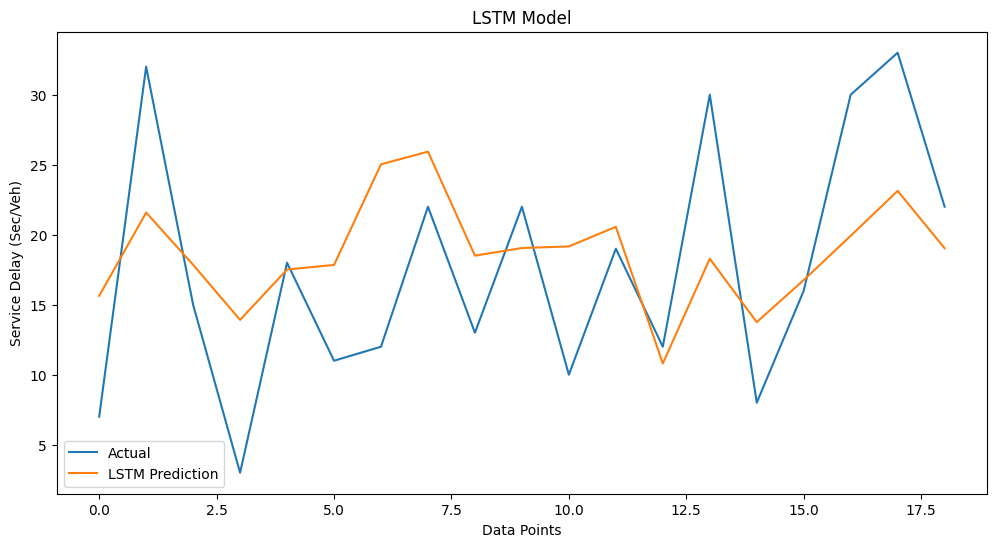

In [9]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [10]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/50
2/2 [==============================] - 3s 337ms/step - loss: 443.3178 - val_loss: 384.7430
Epoch 2/50
2/2 [==============================] - 0s 29ms/step - loss: 441.7202 - val_loss: 383.5398
Epoch 3/50
2/2 [==============================] - 0s 30ms/step - loss: 440.2741 - val_loss: 382.3361
Epoch 4/50
2/2 [==============================] - 0s 33ms/step - loss: 438.8781 - val_loss: 380.9617
Epoch 5/50
2/2 [==============================] - 0s 24ms/step - loss: 437.1499 - val_loss: 379.2826
Epoch 6/50
2/2 [==============================] - 0s 16ms/step - loss: 435.1622 - val_loss: 377.1611
Epoch 7/50
2/2 [==============================] - 0s 19ms/step - loss: 432.4768 - val_loss: 374.4117
Epoch 8/50
2/2 [==============================] - 0s 23ms/step - loss: 428.9438 - val_loss: 370.7641
Epoch 9/50
2/2 [==============================] - 0s 17ms/step - loss: 424.3124 - val_loss: 365.8439
Epoch 10/50
2/2 [==============================] - 0s 14ms/step - loss: 418.2742 - val_los

KeyboardInterrupt: 

Visualize BiLSTM results

0.1645206006215364


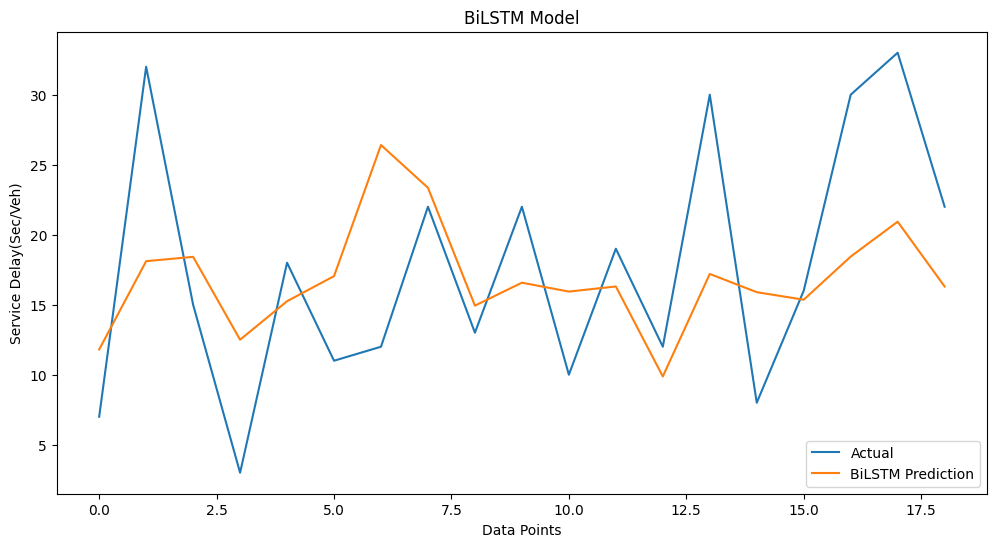

In [ ]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

0.1645206006215364


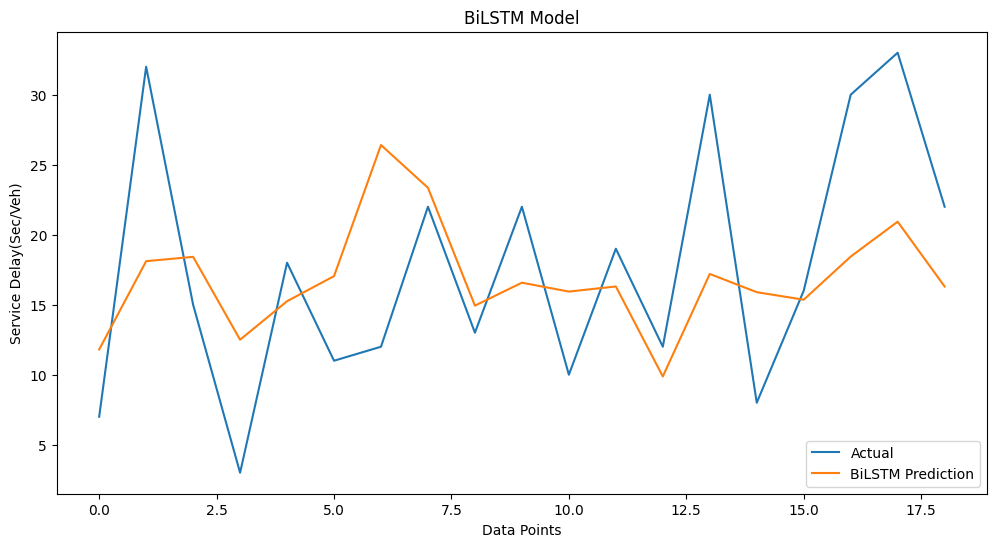

In [ ]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [ ]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/50
2/2 [==============================] - 2s 200ms/step - loss: 443.0779 - val_loss: 384.1444
Epoch 2/50
2/2 [==============================] - 0s 16ms/step - loss: 440.9196 - val_loss: 382.4707
Epoch 3/50
2/2 [==============================] - 0s 31ms/step - loss: 438.9756 - val_loss: 380.7114
Epoch 4/50
2/2 [==============================] - 0s 31ms/step - loss: 436.8708 - val_loss: 378.7652
Epoch 5/50
2/2 [==============================] - 0s 16ms/step - loss: 434.5826 - val_loss: 376.6136
Epoch 6/50
2/2 [==============================] - 0s 26ms/step - loss: 432.0566 - val_loss: 374.0650
Epoch 7/50
2/2 [==============================] - 0s 16ms/step - loss: 428.8980 - val_loss: 370.9795
Epoch 8/50
2/2 [==============================] - 0s 25ms/step - loss: 425.2342 - val_loss: 367.1909
Epoch 9/50
2/2 [==============================] - 0s 16ms/step - loss: 420.7428 - val_loss: 362.4771
Epoch 10/50
2/2 [==============================] - 0s 31ms/step - loss: 415.1609 - val_los

Visualize GRU results

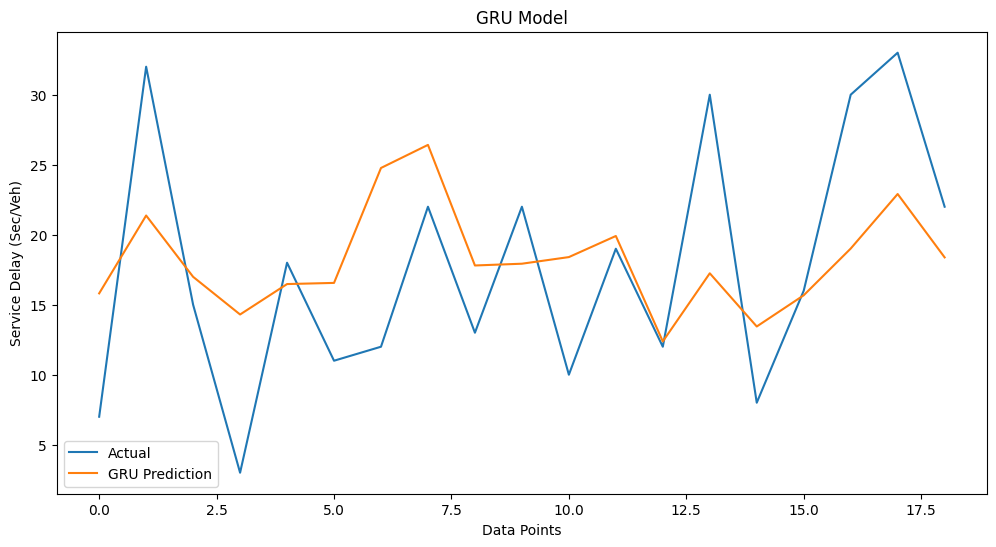

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [ ]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/100
2/2 [==============================] - 3s 385ms/step - loss: 441.5850 - val_loss: 381.9921
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 437.9770 - val_loss: 378.8194
Epoch 3/100
2/2 [==============================] - 0s 34ms/step - loss: 434.1641 - val_loss: 375.2127
Epoch 4/100
2/2 [==============================] - 0s 33ms/step - loss: 429.7432 - val_loss: 370.9911
Epoch 5/100
2/2 [==============================] - 0s 33ms/step - loss: 424.6014 - val_loss: 365.9055
Epoch 6/100
2/2 [==============================] - 0s 25ms/step - loss: 418.5468 - val_loss: 359.5885
Epoch 7/100
2/2 [==============================] - 0s 27ms/step - loss: 411.1327 - val_loss: 351.5977
Epoch 8/100
2/2 [==============================] - 0s 31ms/step - loss: 400.9905 - val_loss: 341.2480
Epoch 9/100
2/2 [==============================] - 0s 17ms/step - loss: 388.2738 - val_loss: 327.5956
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 371.0271

Visualize BiGRU results

0.20965848025884493


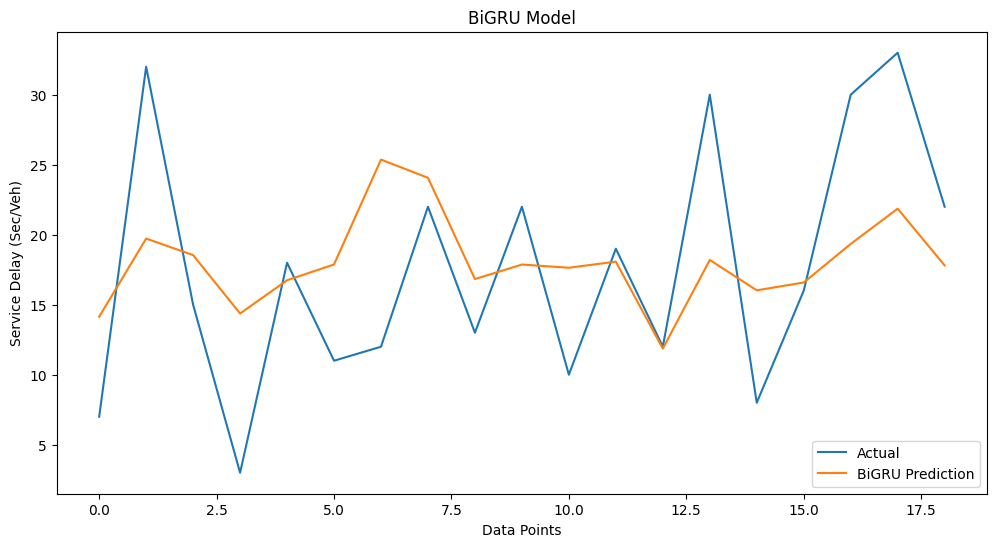

In [ ]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [ ]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=100, batch_size=32, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

Epoch 1/100
2/2 [==============================] - 0s 99ms/step - loss: 422.5084 - val_loss: 412.9491
Epoch 2/100
2/2 [==============================] - 0s 16ms/step - loss: 416.3584 - val_loss: 406.6948
Epoch 3/100
2/2 [==============================] - 0s 31ms/step - loss: 409.7286 - val_loss: 399.8161
Epoch 4/100
2/2 [==============================] - 0s 20ms/step - loss: 402.6696 - val_loss: 392.0826
Epoch 5/100
2/2 [==============================] - 0s 27ms/step - loss: 394.3101 - val_loss: 383.4386
Epoch 6/100
2/2 [==============================] - 0s 26ms/step - loss: 385.2446 - val_loss: 373.7458
Epoch 7/100
2/2 [==============================] - 0s 26ms/step - loss: 374.9846 - val_loss: 363.0216
Epoch 8/100
2/2 [==============================] - 0s 22ms/step - loss: 364.0040 - val_loss: 351.2805
Epoch 9/100
2/2 [==============================] - 0s 25ms/step - loss: 351.5716 - val_loss: 338.4839
Epoch 10/100
2/2 [==============================] - 0s 22ms/step - loss: 337.9890 

Visualize CNN results

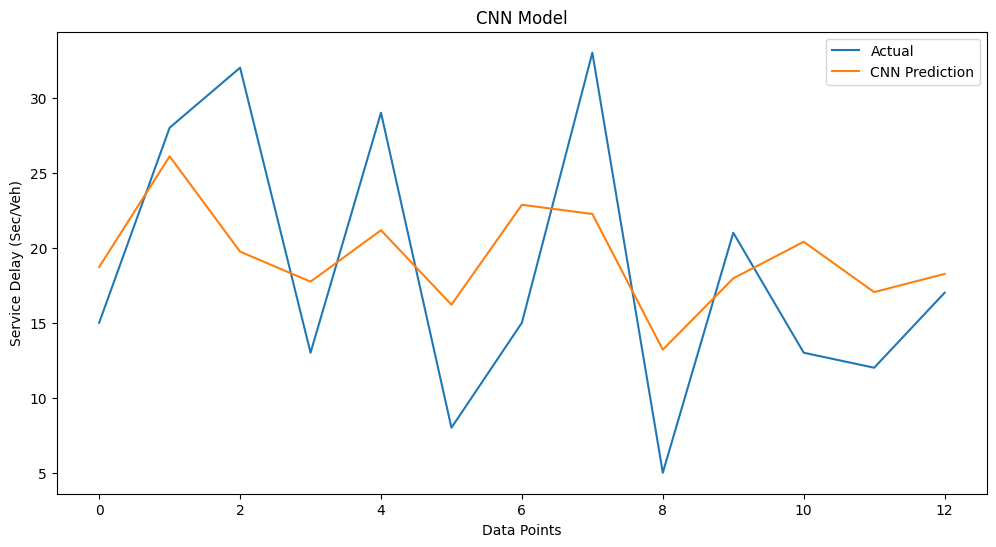

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [ ]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/100
2/2 [==============================] - 1s 163ms/step - loss: 425.9915 - val_loss: 420.1325
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 424.0715 - val_loss: 418.4297
Epoch 3/100
2/2 [==============================] - 0s 25ms/step - loss: 422.2336 - val_loss: 416.8161
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 420.5547 - val_loss: 415.1534
Epoch 5/100
2/2 [==============================] - 0s 31ms/step - loss: 418.7719 - val_loss: 413.3479
Epoch 6/100
2/2 [==============================] - 0s 17ms/step - loss: 416.8831 - val_loss: 411.3408
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 414.7120 - val_loss: 409.0234
Epoch 8/100
2/2 [==============================] - 0s 25ms/step - loss: 412.2055 - val_loss: 406.2995
Epoch 9/100
2/2 [==============================] - 0s 26ms/step - loss: 409.4049 - val_loss: 403.0690
Epoch 10/100
2/2 [==============================] - 0s 22ms/step - loss: 405.9727

Visualize CNN_LSTM results

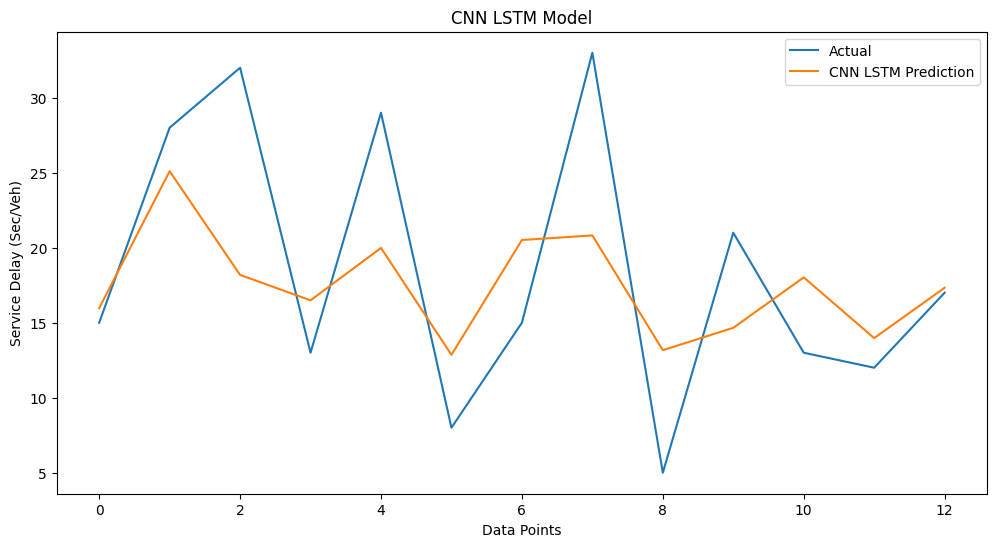

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [ ]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/100
2/2 [==============================] - 2s 247ms/step - loss: 426.1109 - val_loss: 420.0161
Epoch 2/100
2/2 [==============================] - 0s 29ms/step - loss: 423.8098 - val_loss: 417.7602
Epoch 3/100
2/2 [==============================] - 0s 16ms/step - loss: 421.4406 - val_loss: 415.3746
Epoch 4/100
2/2 [==============================] - 0s 31ms/step - loss: 418.8848 - val_loss: 412.7675
Epoch 5/100
2/2 [==============================] - 0s 31ms/step - loss: 416.0943 - val_loss: 409.8512
Epoch 6/100
2/2 [==============================] - 0s 19ms/step - loss: 413.0608 - val_loss: 406.5304
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 409.4053 - val_loss: 402.6725
Epoch 8/100
2/2 [==============================] - 0s 34ms/step - loss: 405.4399 - val_loss: 398.1334
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 400.6149 - val_loss: 392.7257
Epoch 10/100
2/2 [==============================] - 0s 21ms/step - loss: 394.6872

Visualize CNN_BiLSTM results

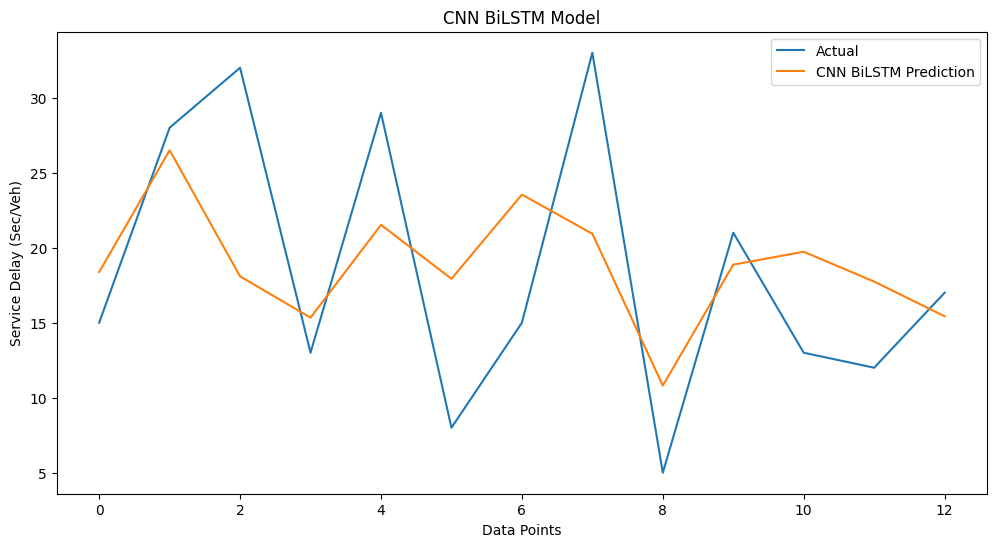

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [ ]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

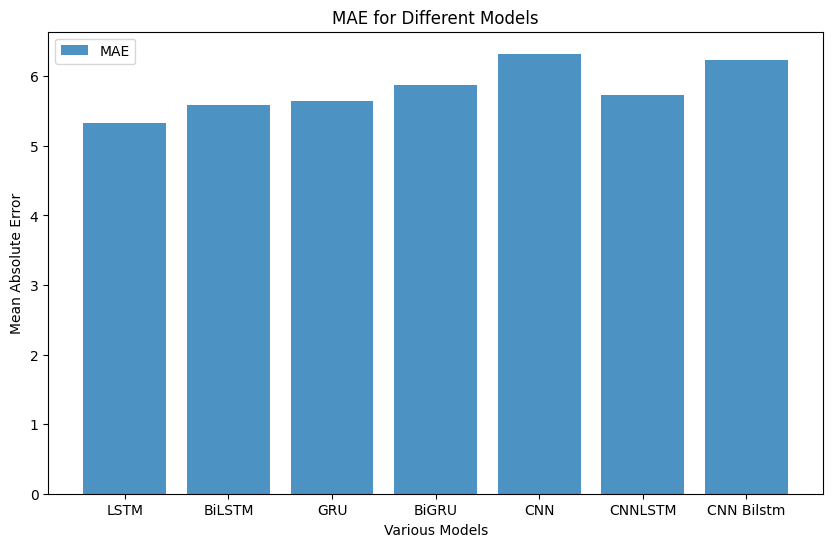

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

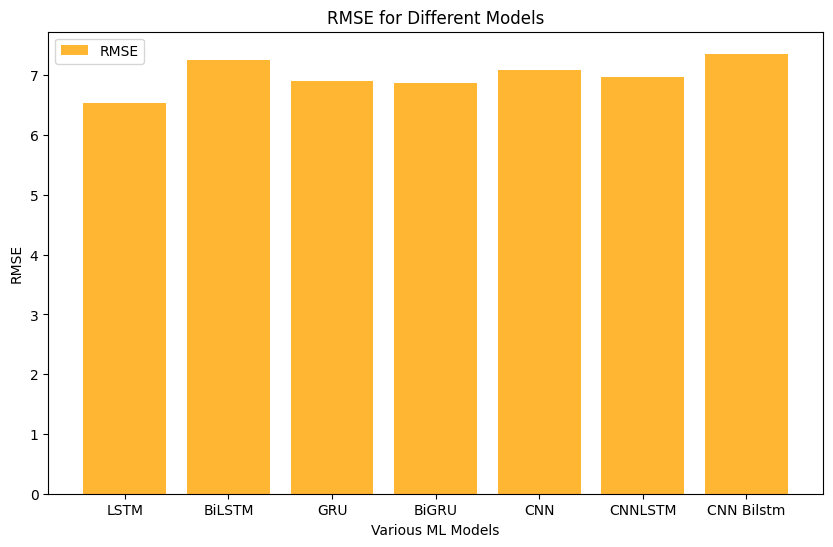

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

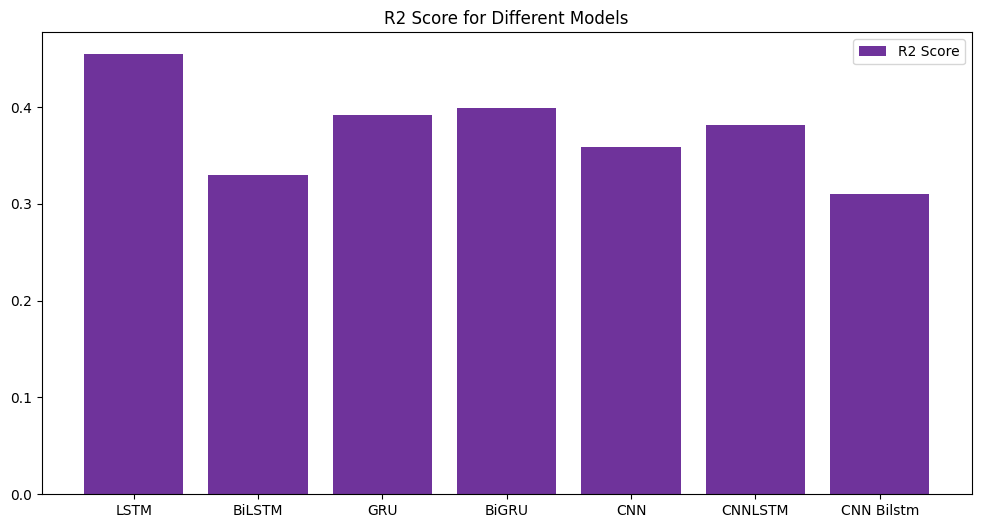

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [ ]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 5.322888521047739
LSTM MSE: 6.545813188492243
LSTM R2 Score: 0.4545603886358852

BiLSTM MAE: 5.590635519761306
BiLSTM MSE: 7.254668110519878
BiLSTM R2 Score: 0.330031230223622

GRU MAE: 5.650419675386869
GRU MSE: 6.912369808903641
GRU R2 Score: 0.3917622230052583

BiGRU MAE: 5.879559076749361
BiGRU MSE: 6.870703470437943
BiGRU R2 Score: 0.39907278666780144

CNN MAE: 6.323754970843975
CNN MSE: 7.095790315388148
CNN R2 Score: 0.3590546404193582

CNN LSTM MAE: 5.737003253056453
CNN LSTM MSE: 6.973258030454305
CNN LSTM R2 Score: 0.38099959645066794

CNN BiLSTM MAE: 6.24026371882512
CNN BiLSTM MSE: 7.362279213950889
CNN BiLSTM R2 Score: 0.31000804211469657


Plot predictions for each model

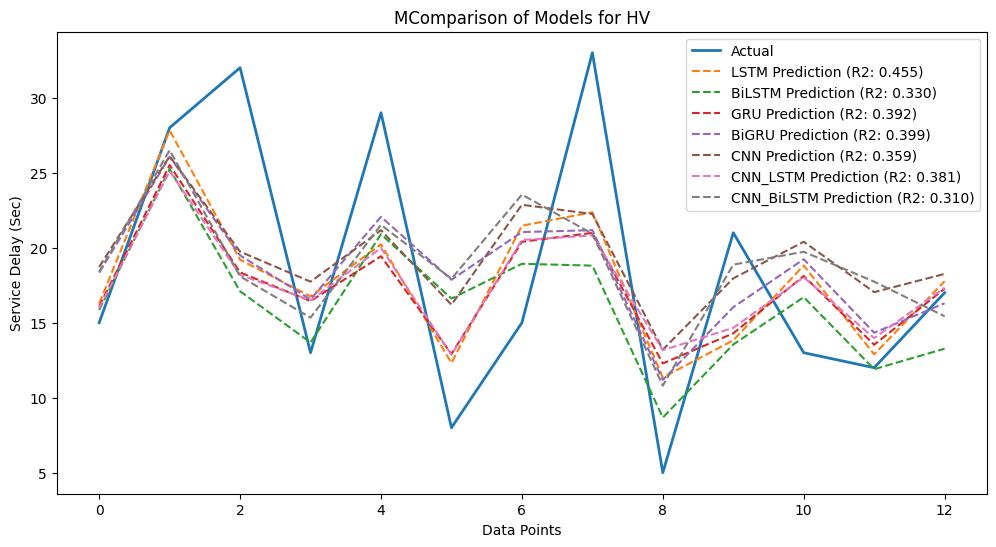

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('MComparison of Models for HV')
plt.show()

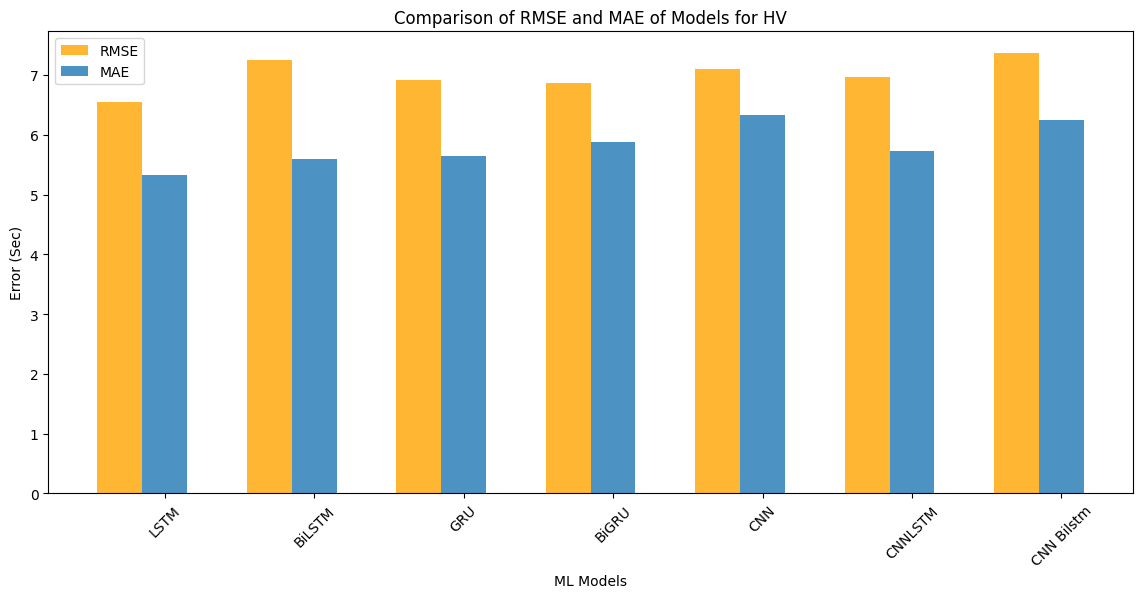

In [ ]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for HV')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()